In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
%matplotlib inline

2024-08-15 17:38:07.938702: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-15 17:38:07.943760: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-15 17:38:07.955851: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 17:38:07.974751: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-15 17:38:07.980174: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-15 17:38:07.994494: I tensorflow/core/platform/cpu_feature_gu

In [4]:
df = pd.read_csv('Boston.csv', header='infer', encoding = 'latin1')
X = df.drop(columns=['medv'])
Y = df['medv']
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X);
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=42)
n_vars = X_train.shape[1]
print(n_vars)
my_model = Sequential()
my_model.add(Dense(input_dim=n_vars, units=1, activation="linear"))
my_model.summary()


13


/home/visitor14/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
n_epochs = 200
batch_size = 10
lr=0.002
my_optimizer = Adam(learning_rate=lr)
my_model.compile(loss="mae", optimizer = my_optimizer, metrics=["mse"])

In [9]:
my_summary = my_model.fit(X_train,y_train, epochs=n_epochs, batch_size =batch_size, validation_split=0.2, verbose=0)
my_summary.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

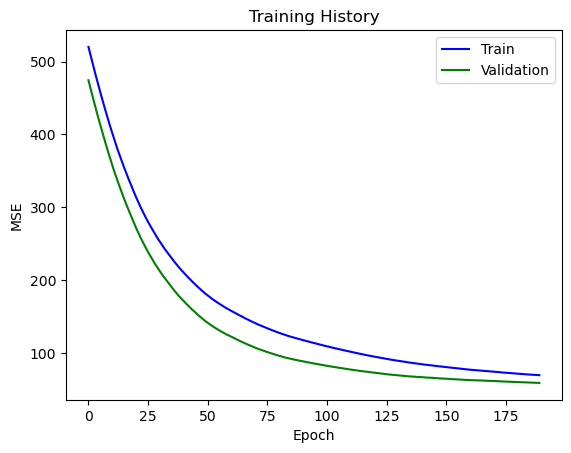

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [12]:
#Bieu dien qua trinh hoc may tren do thi
n_skip = 10
plt.plot(my_summary.history['mse'][n_skip:], c="b")
plt.plot(my_summary.history['val_mse'][n_skip:],c="g")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()
y_pred = my_model.predict(X_test)

MSE = my_model.evaluate(X_test, y_test, verbose=0)

In [13]:
 #Test
y_pred = my_model.predict(X_test)[:0]
MSE = my_model.evaluate(X_test, y_test, verbose=0)[1]
RMSE = np.sqrt(MSE)
print("Test RMSE:{}".format(np.round(RMSE,3)))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step
Test RMSE:7.291
